# 클러스터링 노트북

## 2차원
#### 아래와 같은 절차를 따르면 다음의 클러스터링 관련 그래프 3개를 얻을 수 있다.
* 2차원 클러스터링 산점도 (clusterd.png)
* 클러스터 수 선정 Elbow graph (elbow.png)
* 클러스터 수 선정 Silhouette graph (silhouette.png)

#### 절차
1. 2번째 코드 블럭의 dataset = pd.read_csv의 첫번째 파라미터에 파일 경로를 넣는다
1. 2번째 코드 블럭의 X = dataset[]에 선택할 테이블 헤더를 넣는다
1. 4번째 코드 블럭에 x='', y=''에 위와 같은 테이블 헤더를 넣는다
1. 마지막 코드 블럭의 마지막 부분 km = KMeans()...에서 n_clusters를 바꿔가면서 결과를 비교한다.

## 3차원 ==> 안해보긴함
#### 아래와 같은 절차를 따르면 다음의 클러스터링 관련 그래프 3개를 얻을 수 있다.
* 3차원 클러스터링 산점도 (clusterd.png)
* 클러스터 수 선정 Elbow graph (elbow.png)
* 클러스터 수 선정 Silhouette graph (silhouette.png)

#### 절차
1. 2번째 코드 블럭의 dataset = pd.read_csv의 첫번째 파라미터에 파일 경로를 넣는다
1. 2번째 코드 블럭의 X = dataset[]에 선택할 테이블 헤더를 넣는다
1. 4번째 코드 블럭에 x='', y='', z=''에 위와 같은 테이블 헤더를 넣는다
1. 마지막 코드 블럭의 마지막 부분 km = KMeans()...에서 n_clusters를 바꿔가면서 결과를 비교한다.

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sb
from sklearn.metrics import silhouette_samples
from matplotlib import cm

style.use('seaborn-talk')

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [15]:
dataset = pd.read_csv("C:/Users/auteu/Desktop/Projects/UOS/WaRaConv/ProcessedDataSet/클러스터링용_3년평균.csv", encoding='cp949',engine='python')
dataset
X = dataset[["생활/주민등록","임대시세평균"]]
X

,생활/주민등록,임대시세평균
0,1.870777,216153
1,2.063066,232672
2,1.192755,135292
3,1.096451,124634
4,1.030131,115345
5,1.008159,115588
6,0.874665,92801
7,0.951885,108660
8,0.934334,96100
9,0.846578,100615


In [23]:
from sklearn.cluster import KMeans

init_centroid = 'k-means++'

km = KMeans(n_clusters=2,init=init_centroid, random_state=0)
y_km=km.fit_predict(X)

dataset['클러스터']=km.labels_
dataset

,지역,2018_주민등록,2018_생활,2019_주민등록,2019_생활,2020_주민등록,2020_생활,주민등록평균,생활인구 평균,생활/주민등록,임대시세평균,클러스터
0,종로구,163569,327129.9419,162413,297878.5838,160520,285128.0052,162167.3333,303378.8436,1.870777,216153,1
1,중구,135427,295561.2404,136276,283560.4030,136030,262058.4160,135911.0000,280393.3531,2.063066,232672,1
2,용산구,245245,301951.4060,245069,290558.8489,245362,284971.1743,245225.3333,292493.8097,1.192755,135292,0
3,성동구,316068,348201.7617,312991,333640.7590,304851,342144.2901,311303.3333,341328.9369,1.096451,124634,0
4,광진구,370519,393078.4127,369470,374767.6011,363925,369330.5561,367971.3333,379058.8566,1.030131,115345,0
5,동대문구,364527,379025.7640,363101,358814.1547,360380,359044.8371,362669.3333,365628.2519,1.008159,115588,0
6,중랑구,410296,364152.3558,405639,344597.3926,399415,354274.0796,405116.6667,354341.2760,0.874665,92801,0
7,성북구,451829,442707.3025,452292,418334.5911,452290,430105.3706,452137.0000,430382.4214,0.951885,108660,0
8,강북구,326063,309459.8911,319377,288379.1106,315395,299901.7257,320278.3333,299246.9092,0.934334,96100,0
9,도봉구,344096,299595.4289,339001,278092.8013,331744,281454.2510,338280.3333,286380.8271,0.846578,100615,0


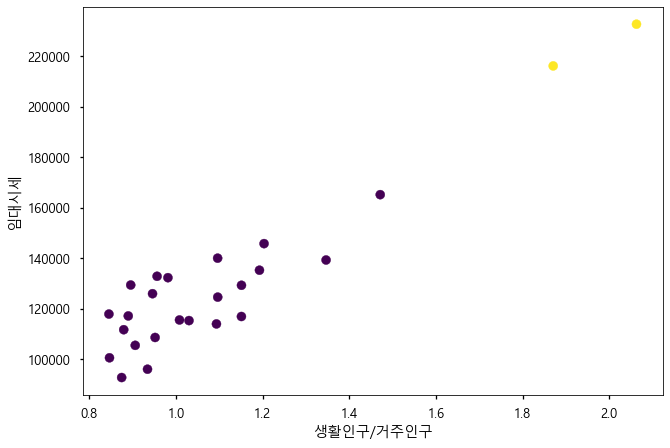

In [24]:
plt.scatter(x=X['생활/주민등록'],y=X['임대시세평균'],c = km.labels_, marker='o',)
#plt.title('생활인구-거주인구')
plt.ylabel('임대시세')
plt.xlabel('생활인구/거주인구')
plt.savefig('clustered1.png')

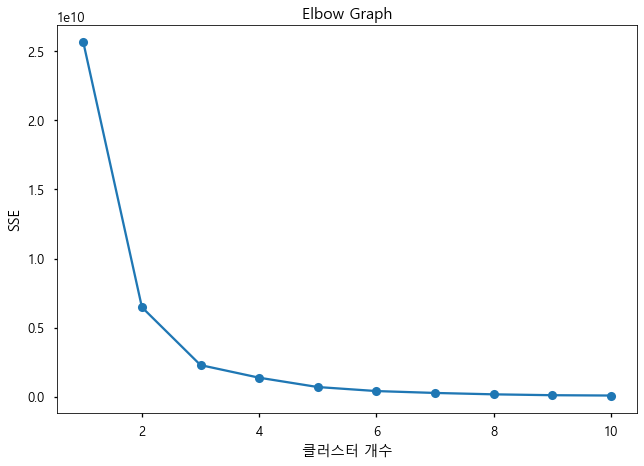

In [18]:
def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state = 0)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11),sse,marker='o')
    plt.title('Elbow Graph')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.savefig('Elbow.png',dpi=200)

elbow(X)

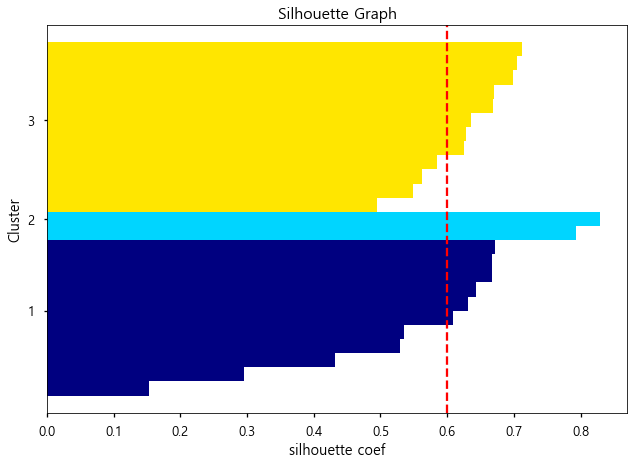

0.59967017690157


In [20]:
def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower,y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower+y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red',linestyle='--')
    plt.yticks(yticks,cluster_labels+1)
    plt.title('Silhouette Graph')
    plt.ylabel('Cluster')
    plt.xlabel('silhouette coef')
    plt.savefig('silhouette.png',dpi=200)
    plt.show()
    print(silhouette_avg)

km = KMeans(n_clusters=3, random_state = 0)
y_km = km.fit_predict(X)
plotSilhouette(X, y_km)